「実写写真画像を加工してマンガ風の画像を生成するプログラム」を作成しなさい。
　⇒実現に必要な機能をリストアップしてからコーディングすると良い。また、吹き出しや効果音等も好みに応じて追加して良い。できるだけカッコ良くマンガ化すること。

In [1]:
from PIL import Image,ImageFilter, ImageOps, ImageChops, ImageEnhance, ImageFilter

In [2]:
img = Image.open("image/img1.jpg")

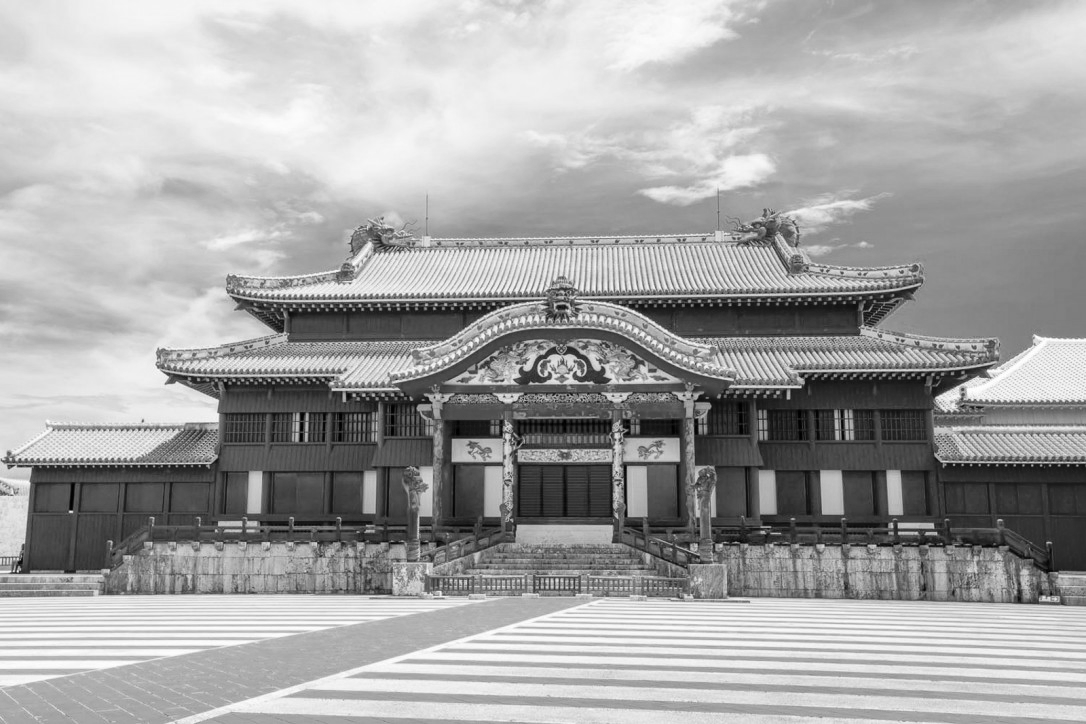

In [3]:
img.convert("L")

In [4]:
f=img.filter(ImageFilter.MedianFilter())

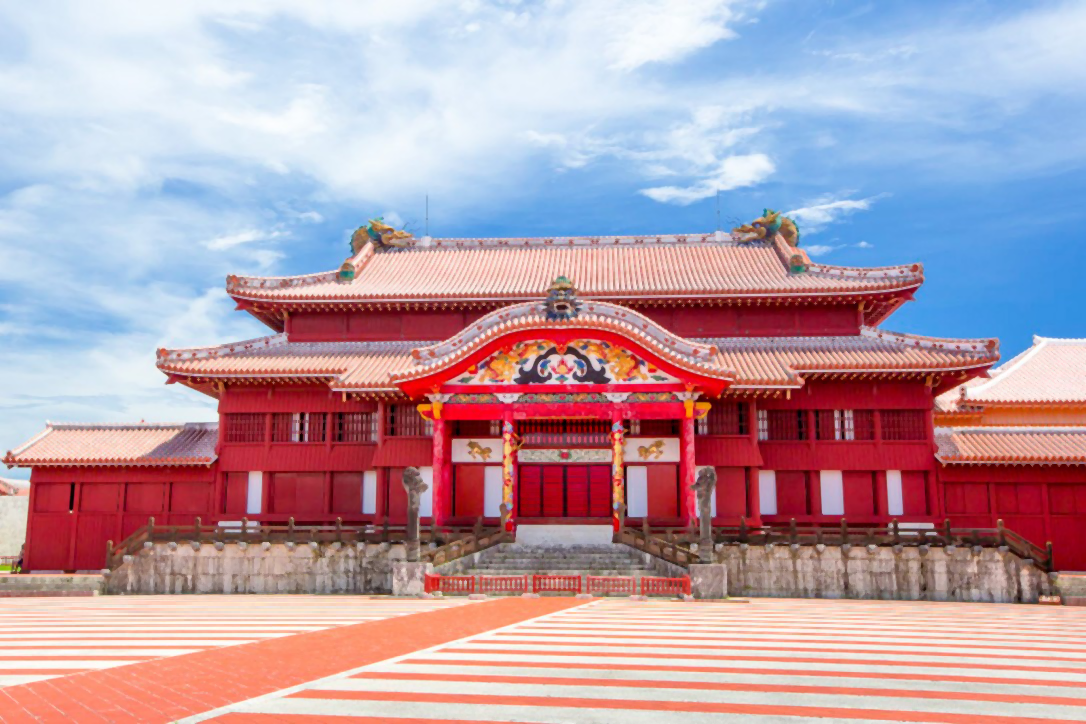

In [5]:
f

In [6]:
gray = f.convert("L")
gray2 = gray.filter(ImageFilter.MaxFilter(5))
senga_inv = ImageChops.difference(gray, gray2)
senga = ImageOps.invert(senga_inv).convert('RGBA')


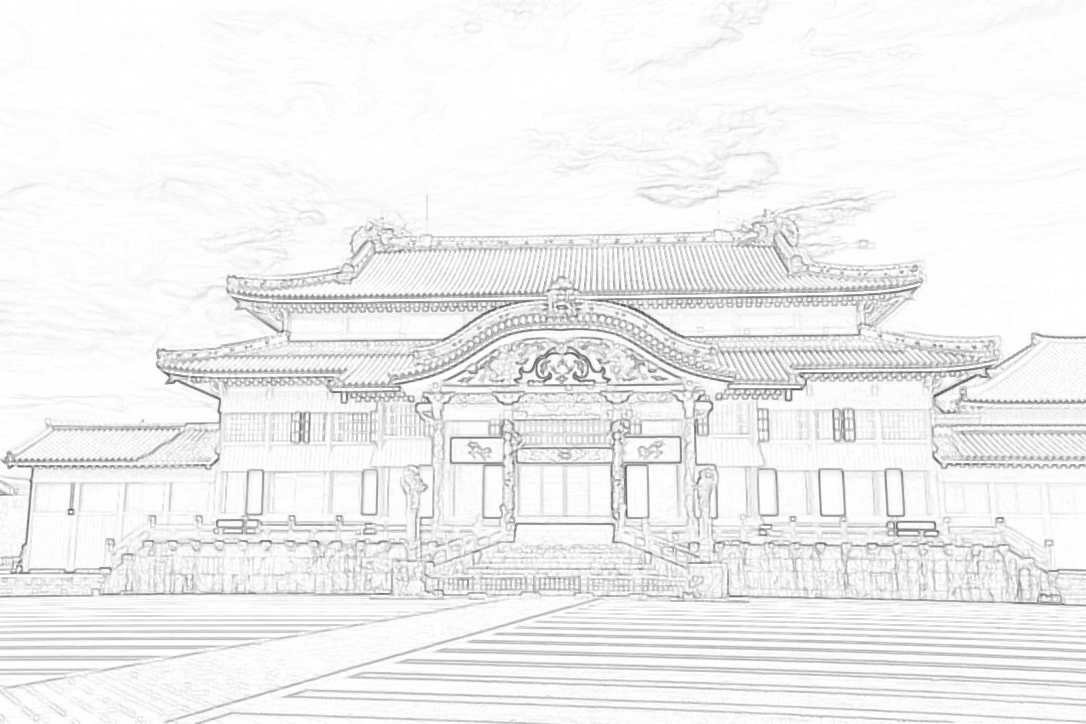

In [7]:
senga

In [8]:
alpha = senga
for x in range(alpha.size[0]):
    for y in range(alpha.size[1]):
        i = alpha.getpixel((x,y))
        hoge = 230
        if i[0] > hoge and i[1] > hoge and i[2] > hoge:
            alpha.putpixel((x, y), (255, 255, 255, 0))
        else:
            iro = 0
            alpha.putpixel((x, y), (iro, iro, iro, 255))
alpha.save('2.png')

In [9]:
import numpy as np

In [10]:
enhancer = ImageEnhance.Sharpness(f)
sha_mi=enhancer.enhance(-0.0)

In [11]:
enhancer = ImageEnhance.Color(sha_mi)
enh=enhancer.enhance(0.7)

In [12]:
post=ImageOps.posterize(enh, 5)

In [13]:
enhancer = ImageEnhance.Sharpness(post)
sha_pul=enhancer.enhance(1.5).convert('RGBA')

In [14]:
ani_pic = Image.alpha_composite(sha_pul,alpha)

In [19]:
ani_pic.save('image/pic1.png')

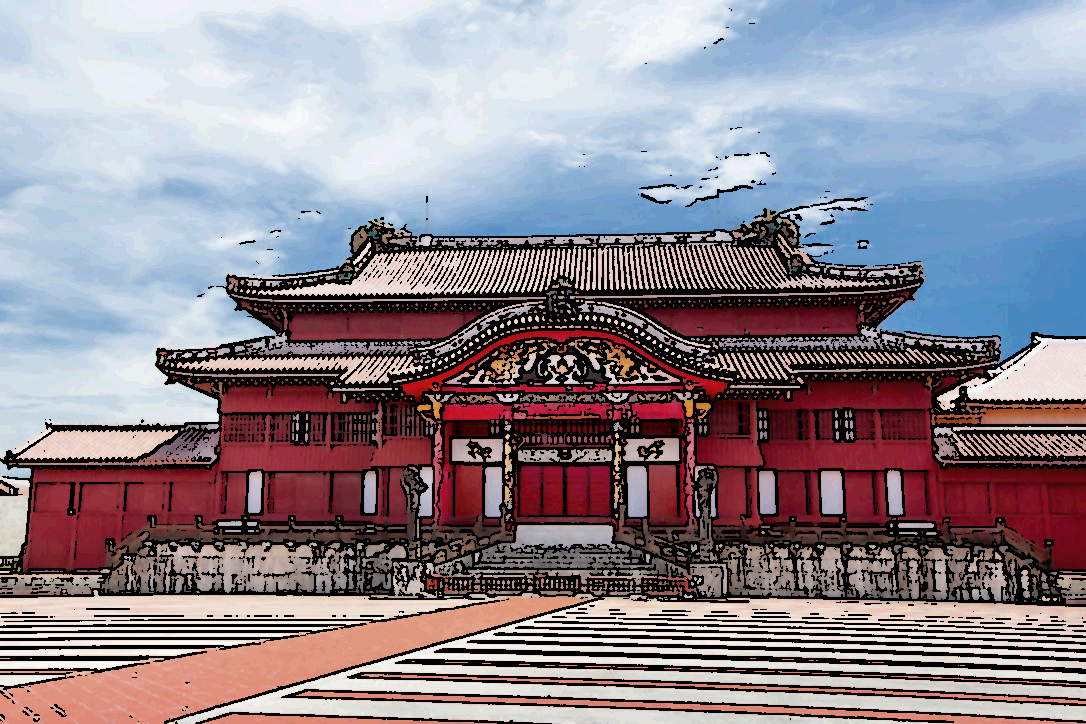

In [18]:
ani_pic